In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/student-performance-in-mathematics/exams.csv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
import plotly.express as px

In [3]:
data=pd.read_csv("/kaggle/input/student-performance-in-mathematics/exams.csv")
data

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
3,male,group B,some college,free/reduced,none,70,70,63
4,female,group D,associate's degree,standard,none,83,85,86
...,...,...,...,...,...,...,...,...
995,male,group C,some college,standard,none,77,77,71
996,male,group C,some college,standard,none,80,66,66
997,female,group A,high school,standard,completed,67,86,86
998,male,group E,high school,standard,none,80,72,62


In [4]:
data.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64


# **Students who are successful in 70 or more exams in all exams**


In [5]:
def dataa(x,y,m):
    for i in data["math score"]:
        if i>=x:
            a=data[data["math score"]>=x]
            for k in a["reading score"]:
                if k>=y:
                    b=data[data["reading score"]>=y]
                    for x in b["writing score"]:
                        if x>=m:
                            z=data[data["writing score"]>=m]
                            return z
                        

In [6]:
data_success=dataa(70,70,70)

In [7]:
data_success

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group D,some college,standard,completed,59,70,78
1,male,group D,associate's degree,standard,none,96,93,87
2,female,group D,some college,free/reduced,none,57,76,77
4,female,group D,associate's degree,standard,none,83,85,86
6,female,group E,associate's degree,standard,none,82,83,80
...,...,...,...,...,...,...,...,...
991,female,group A,associate's degree,standard,none,72,77,77
993,male,group D,some high school,standard,none,83,74,80
994,female,group B,associate's degree,standard,none,82,97,90
995,male,group C,some college,standard,none,77,77,71


In [8]:
data_success.gender.value_counts()

female    311
male      202
Name: gender, dtype: int64

In [9]:
data_success["test preparation course"].value_counts()

none         281
completed    232
Name: test preparation course, dtype: int64

In [10]:
data_success["lunch"].value_counts()

standard        390
free/reduced    123
Name: lunch, dtype: int64

In [11]:
data_success["parental level of education"].value_counts()

associate's degree    119
some college          115
high school            90
some high school       76
bachelor's degree      64
master's degree        49
Name: parental level of education, dtype: int64

In [12]:
x=data_success[data_success["gender"]=="male"]
y=data_success[data_success["gender"]=="female"]

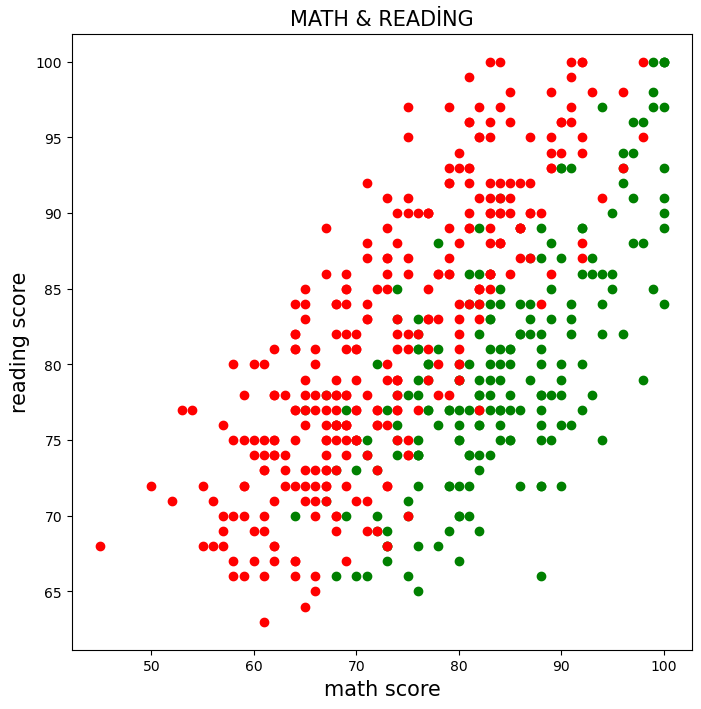

In [13]:
plt.figure(figsize=(8,8))
plt.scatter(x["math score"],x["reading score"],color="green")
plt.scatter(y["math score"],y["reading score"],color="red")
plt.xlabel("math score",fontsize=15)
plt.ylabel("reading score",fontsize=15)
plt.title("MATH & READİNG",fontsize=15)
plt.show()

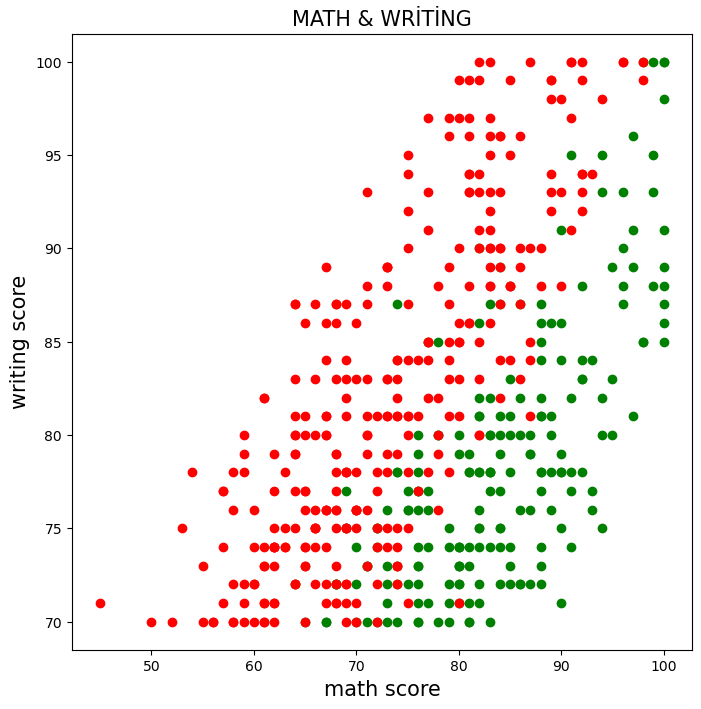

In [14]:
plt.figure(figsize=(8,8))
plt.scatter(x["math score"],x["writing score"],color="green")
plt.scatter(y["math score"],y["writing score"],color="red")
plt.xlabel("math score",fontsize=15)
plt.ylabel("writing score",fontsize=15)
plt.title("MATH & WRİTİNG",fontsize=15)
plt.show()

In [15]:
data_success.corr()

,math score,reading score,writing score
math score,1.000000,0.620036,0.548001
reading score,0.620036,1.000000,0.850816
writing score,0.548001,0.850816,1.000000


<AxesSubplot:>

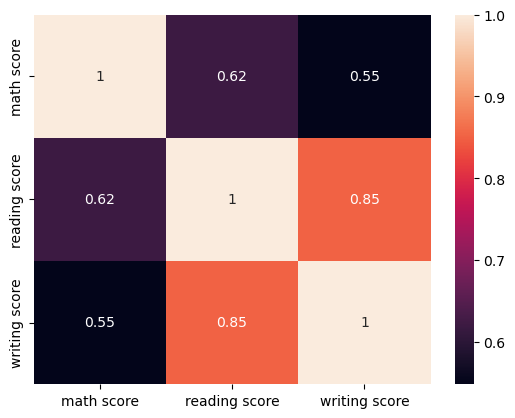

In [16]:
sns.heatmap(data_success.corr(),annot=True)

In [17]:
dd=px.scatter_3d(data,x="math score",y="reading score",z="writing score",color="math score")
dd.show()

In [18]:
def find(x,y,m):
    for i in data["math score"]:
        if i>=x:
            a=data[data["math score"]==x]
            for k in a["reading score"]:
                if k>=y:
                    b=data[data["reading score"]==y]
                    for x in b["writing score"]:
                        if x>=m:
                            z=data[data["writing score"]==m]
                            return z
                        

In [19]:
find(99,100,100)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
115,female,group E,bachelor's degree,standard,none,98,95,100
156,female,group B,associate's degree,standard,completed,91,99,100
292,female,group E,associate's degree,standard,none,96,93,100
378,male,group D,bachelor's degree,standard,completed,100,100,100
389,female,group D,high school,standard,completed,91,100,100
472,male,group D,bachelor's degree,standard,completed,98,96,100
566,male,group D,associate's degree,standard,completed,99,100,100
732,female,group D,associate's degree,standard,completed,82,95,100
809,female,group E,some college,standard,completed,96,98,100
835,female,group D,bachelor's degree,standard,completed,83,100,100
